17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 5s 118ms/step - loss: 0.5344 - accuracy: 0.7647 - val_loss: 0.4183 - val_accuracy: 0.8480
Epoch 2/20
30/30 [==============================] - 3s 92ms/step - loss: 0.3312 - accuracy: 0.8944 - val_loss: 0.3318 - val_accuracy: 0.8726
Epoch 3/20
30/30 [==============================] - 2s 72ms/step - loss: 0.2489 - accuracy: 0.9175 - val_loss: 0.3332 - val_accuracy: 0.8628
Epoch 4/20
30/30 [==============================] - 2s 72ms/step - loss: 0.1989 - accuracy: 0.9343 - val_loss: 0.2861 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 2s 71ms/step - loss: 0.1677 - accuracy: 0.9447 - val_loss: 0.2771 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 2s 78ms/step - loss: 0.1389 - accuracy: 0.9566 - val_loss: 0.3068 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 3s 98ms/step - loss: 0.1218 - accura

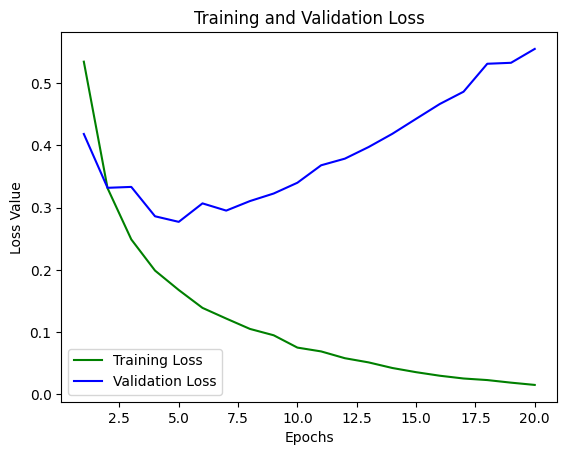

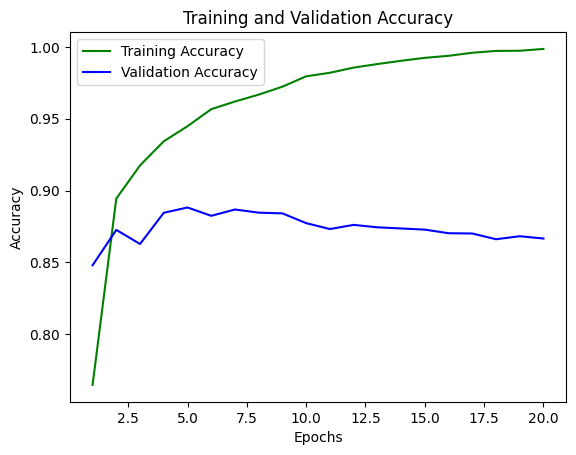

Epoch 1/3
30/30 [==============================] - 2s 81ms/step - loss: 0.0168 - accuracy: 0.9967 - val_loss: 0.5741 - val_accuracy: 0.8700
Epoch 2/3
30/30 [==============================] - 2s 54ms/step - loss: 0.0083 - accuracy: 0.9998 - val_loss: 0.6015 - val_accuracy: 0.8667
Epoch 3/3
782/782 [==============================] - 2s 3ms/step
Mean Absolute Error: 0.49999693


In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers
import matplotlib.pyplot as plt

# Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Vectorize sequences
X_train = np.zeros((len(train_data), 10000))
for i, seq in enumerate(train_data):
    X_train[i, seq] = 1

X_test = np.zeros((len(test_data), 10000))
for i, seq in enumerate(test_data):
    X_test[i, seq] = 1

y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

# Model definition
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model compilation
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Validation data
X_val, partial_X_train = X_train[:10000], X_train[10000:]
y_val, partial_y_train = y_train[:10000], y_train[10000:]

# Model training
history = model.fit(partial_X_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(X_val, y_val))

# Plotting training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Plotting training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Training for additional epochs
model.fit(partial_X_train, partial_y_train,
          epochs=3, batch_size=512,
          validation_data=(X_val, y_val))

# Making predictions
y_pred = model.predict(X_test).round()

# Evaluating predictions
mae = np.mean(np.abs(y_pred - y_test))
print("Mean Absolute Error:", mae)


